In [1]:
from FFP_SA import FFP

reading parameters...
NARROWBAND SIMULATION
ocean-atmosphere


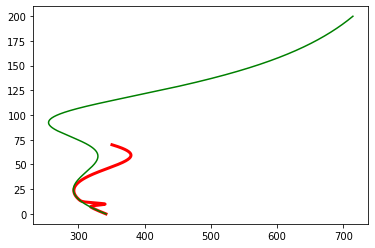

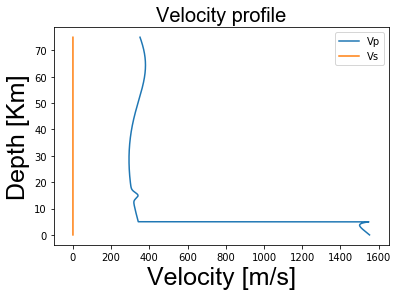

SOLVING ONLY FOR ACOUSTIC MEDIUM
Get Green's
Go to range
78.74915218353271
directory exist. removing and recreating
1.116186 338.16928
1000.0 1501.283


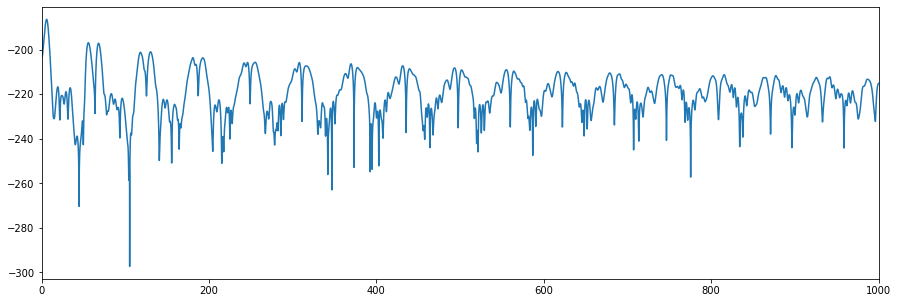

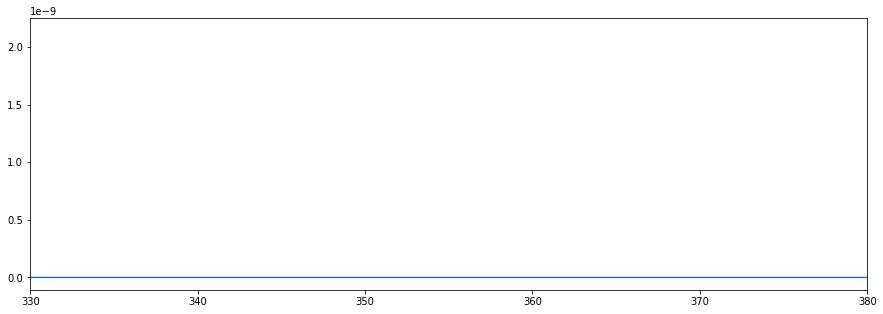

In [9]:
FFP('input-parameters')